# Total Mainnet Transaction Analysis

In [1]:
import json
import pandas as pd
import numpy as np
import datetime
import plotly.express as px 
import plotly.graph_objects as go
from IPython.core.display import display, HTML
import os
from os import path

In [2]:
def is_json(myjson):
    try:
        json_object = json.loads(myjson)
    except ValueError as e:
        return False
    return True

In [3]:
def read_data(path):
    data = []
    with open(path, errors='ignore') as f:
        for line in f.readlines():
            try: 
                if not is_json(line):
                    continue
                data.append(json.loads(line))
            except:
                print('bad json: ', line)
    return data

In [4]:
def draw_graph(df, feature, name):
    html_path = "https://harmony-one.github.io/harmony-log-analysis/" + html_dir.replace("../../docs/", "")
    fig = px.line(df, x='timestamp', y=feature, color='shard', color_discrete_sequence=px.colors.qualitative.Pastel,\
                      title = '{:s} vs UTC Time'.format(name))
    fig.update_layout(xaxis_title="utc_time")
    if len(df.groupby('shard')['shard'].count()) == 1:
        fig.update_layout(showlegend=False)
    fig.show(renderer="svg",width=800, height=500)
    fig.write_html("{:s}{:s}_vs_utc_time.html".format(html_dir,feature))
    print("HTML saved in " )
    display_path = "{:s}{:s}_vs_utc_time.html".format(html_path,feature)
    display(HTML("<a href='" + display_path + "' target='_blank'>" + display_path + "</a>"))

In [5]:
data = read_data("../logs/mainnet_2020_05_06.log")
df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'], format = '%Y_%m_%d %H:%M:%S')
df['date'] = df['timestamp'].apply(lambda c: c.date().strftime('%Y-%m-%d'))
df.sort_values(by=['timestamp'], inplace = True)

In [6]:
new = df.groupby(['date','shard']).tail(1).reset_index(drop = True)
total = new.groupby('date')['shard-transactions'].sum()
total = pd.DataFrame(total)
total.rename(columns={"shard-transactions": "total-transactions"}, inplace=True)
new = new.join(total, on = 'date')
new.sort_values(by=['timestamp'], inplace = True)


In [7]:
daily = new.groupby('date').tail(1).reset_index(drop = True)
daily['daily-transactions'] = (daily['total-transactions']-daily['total-transactions'].shift()).fillna(0).astype(int)
daily = daily[daily['timestamp'] < '2020-05-07']
daily['shard'] = 1

In [8]:
html_dir = "../../../docs/graphs/transactions/"
if not path.exists(html_dir):
    try:
        os.makedirs(html_dir)
    except:
        print("Could not make directory")
        exit(1)

## shard Transactions Change

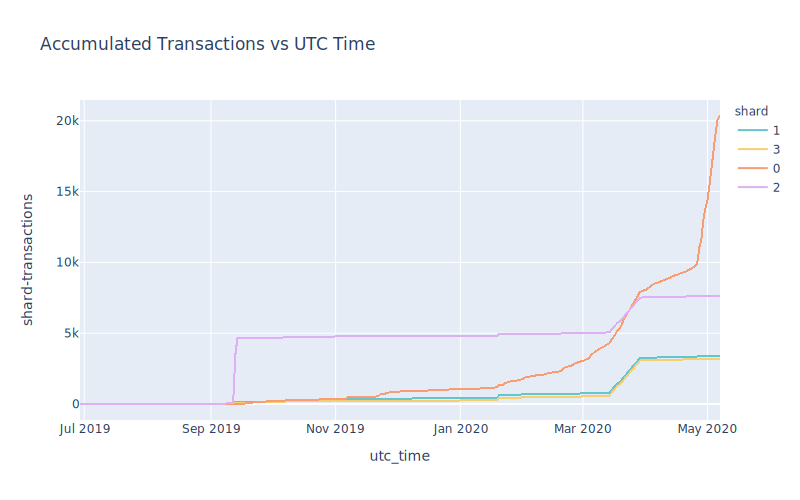

HTML saved in 


In [9]:
draw_graph(new, 'shard-transactions', "Accumulated Transactions")

## Total Transaction Visualization

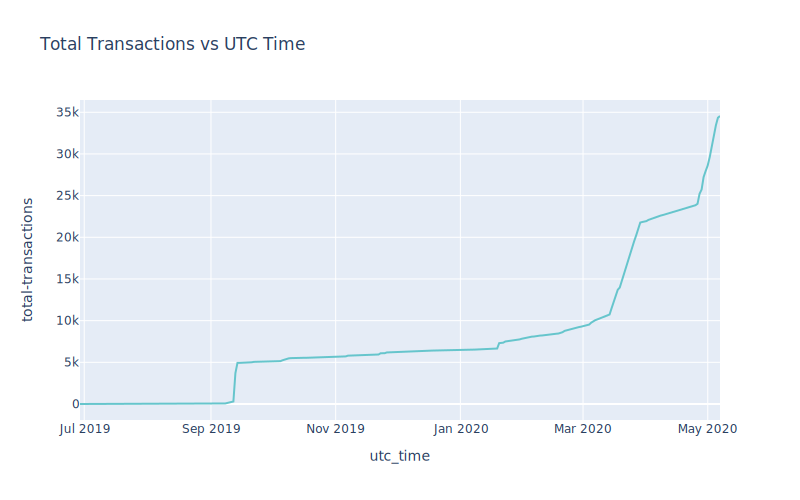

HTML saved in 


In [10]:
draw_graph(daily, 'total-transactions', "Total Transactions")

## Daily Transactions Visualization

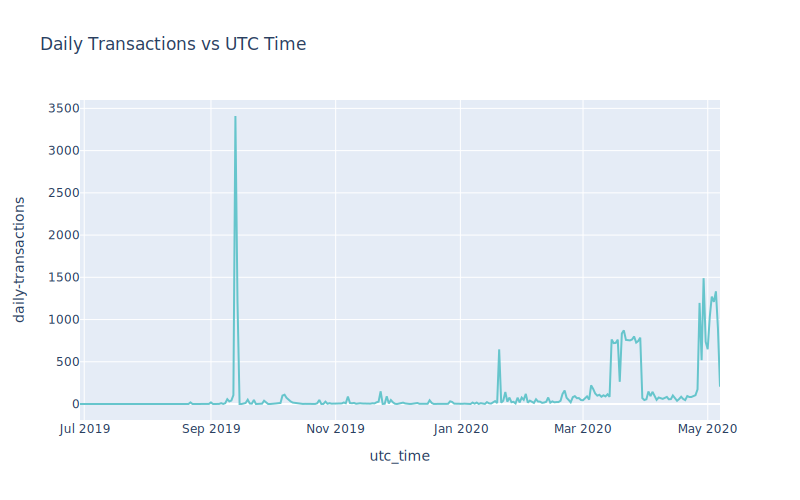

HTML saved in 


In [11]:
draw_graph(daily, 'daily-transactions', "Daily Transactions")